# Air Quality Index (AQI) Prediction using CNN

# Step 1: Load Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file1_path = "/content/drive/My Drive/Datasets/aq_kathmandu_us_diplomatic_post_phora_durbar_kathmandu.csv"
file2_path = "/content/drive/My Drive/Datasets/aq_kathmandu_us-diplomatic-post_embassy_kathmandu.csv"


In [ ]:
import pandas as pd

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Display first few rows
df1.head(), df2.head()


(   locationId                                    location       city country  \
 0        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
 1        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
 2        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
 3        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
 4        3460  US Diplomatic Post: Phora Durbar Kathmandu  Kathmandu      NP   
 
                          utc                      local parameter   value  \
 0  2021-03-12T18:15:00+00:00  2021-03-13T00:00:00+05:45        o3   0.051   
 1  2021-03-12T18:15:00+00:00  2021-03-13T00:00:00+05:45      pm25  69.000   
 2  2021-03-12T17:15:00+00:00  2021-03-12T23:00:00+05:45      pm25  69.000   
 3  2021-03-12T17:15:00+00:00  2021-03-12T23:00:00+05:45        o3   0.030   
 4  2021-03-12T16:15:00+00:00  2021-03-12T22:00:00+05:45        o3   0.030   
 
     unit   latitude  longitude  
 0    pp

# Step 4: Merge and Preprocess Data

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df['local'] = pd.to_datetime(df['local'])  # Convert time column
df = df.pivot_table(index='local', columns='parameter', values='value').reset_index()
df.fillna(method='ffill', inplace=True)  # Handle missing values

<ipython-input-12-17f68b5c6824>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Handle missing values


# Step 5: Normalize Data

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])  # Scale pollutants
df_scaled = np.array(df_scaled)


# Step 6: Create Time-Series Data

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Time steps
X, y = create_sequences(df_scaled, seq_length)

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build CNN Model

In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, X.shape[2])),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(X.shape[2], activation='linear')  # Output layer
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 8: Train Model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0382 - val_loss: 0.0053
Epoch 2/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0107 - val_loss: 0.0063
Epoch 3/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0081 - val_loss: 0.0048
Epoch 4/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0064 - val_loss: 0.0049
Epoch 5/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 6/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 7/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 8/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 9/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 10/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 11/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 12/20
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

# Step 9: Evaluate Model

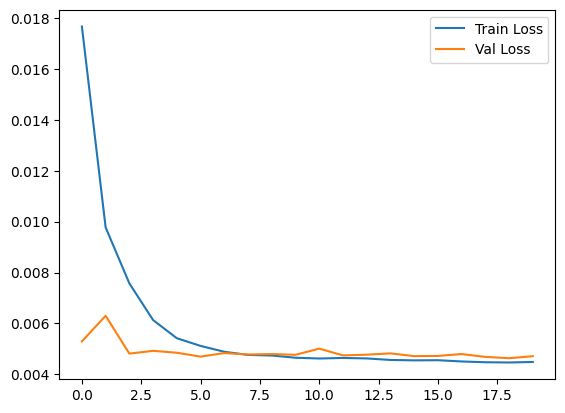

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# Step 10: Save and Test Model

In [ ]:
model.save("aqi_cnn_model.h5")
predictions = model.predict(X_test)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Rescale predictions

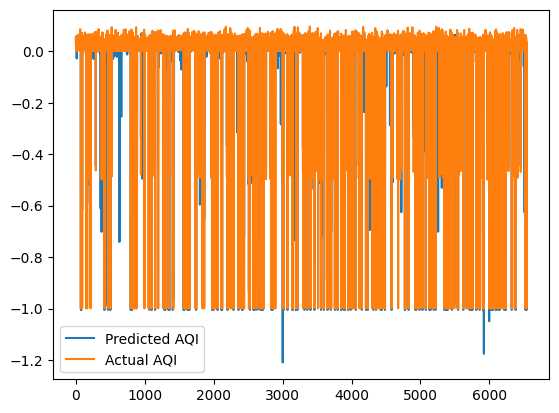

In [ ]:
predictions_rescaled = scaler.inverse_transform(predictions)
plt.plot(predictions_rescaled[:, 0], label='Predicted AQI')
plt.plot(scaler.inverse_transform(y_test)[:, 0], label='Actual AQI')
plt.legend()
plt.show()


 # Step 11: Evaluate Model Performance


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.004708951333213524
Mean Absolute Error (MAE): 0.01844893909436922
R-squared (R²): 0.7920012515224846


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Define AQI categories (adjust thresholds as per AQI standards)

In [ ]:
def categorize_aqi(value):
    if value <= 50:
        return "Good"
    elif value <= 100:
        return "Moderate"
    elif value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif value <= 200:
        return "Unhealthy"
    elif value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Convert predictions and actual values to AQI categories

In [ ]:
actual_categories = [categorize_aqi(val) for val in scaler.inverse_transform(y_test)[:, 0]]
predicted_categories = [categorize_aqi(val) for val in predictions_rescaled[:, 0]]

# Compute confusion matrix

In [ ]:
conf_matrix = confusion_matrix(actual_categories, predicted_categories, labels=[
    "Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"
])

# Plot confusion matrix

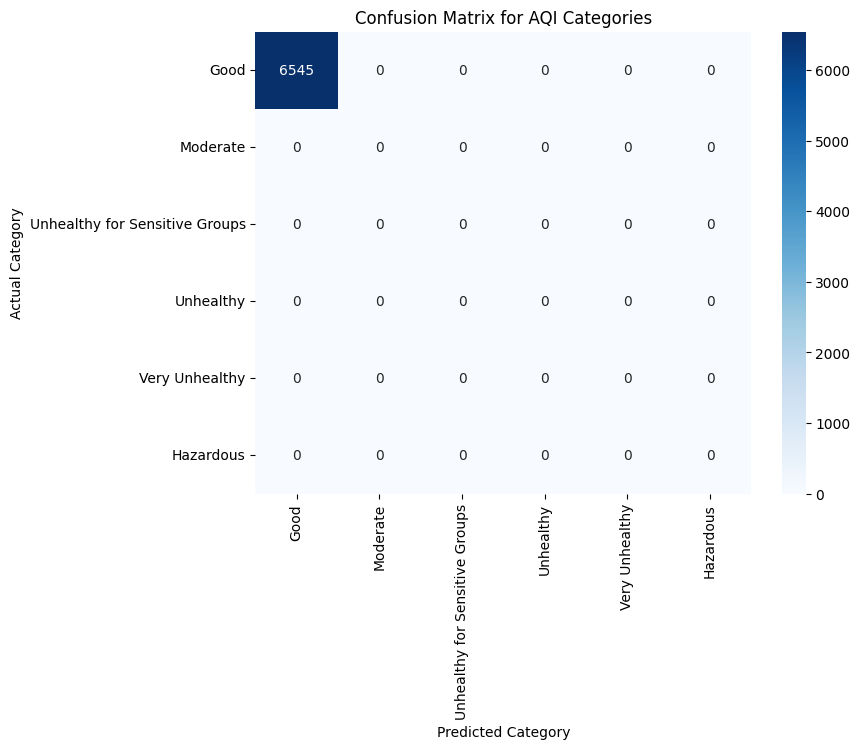

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
    "Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"
], yticklabels=[
    "Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"
])
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for AQI Categories")
plt.show()

# Classification report


In [ ]:
print(classification_report(actual_categories, predicted_categories))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      6545

    accuracy                           1.00      6545
   macro avg       1.00      1.00      1.00      6545
weighted avg       1.00      1.00      1.00      6545



#Step 12: Save the Model for Future Use

In [ ]:
model.save("/content/drive/My Drive/Datasets/aqi_cnn_model.h5")
